<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objectif-:" data-toc-modified-id="Objectif-:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objectif :</a></span></li><li><span><a href="#Dev" data-toc-modified-id="Dev-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dev</a></span></li><li><span><a href="#Industrialisation" data-toc-modified-id="Industrialisation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Industrialisation</a></span><ul class="toc-item"><li><span><a href="#Script" data-toc-modified-id="Script-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Script</a></span></li></ul></li><li><span><a href="#Analyse-de-la-feature" data-toc-modified-id="Analyse-de-la-feature-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Analyse de la feature</a></span><ul class="toc-item"><li><span><a href="#Analyse-des-dépot-suivant-les-stations" data-toc-modified-id="Analyse-des-dépot-suivant-les-stations-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Analyse des dépot suivant les stations</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np

from vcub_keeper.reader.reader import *
from vcub_keeper.visualisation import plot_station_activity

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

%load_ext autoreload
%autoreload 2

## Objectif :

- Création d'une features afin de connaitre le nombre d'ajout de vélo qu'il y a eu pour une même station entre 2 points temporels. cf https://github.com/armgilles/vcub_keeper/issues/4
- Industrialisation de la fonction
- Analyse des résultats

## Dev

In [2]:
# Lecture de l'activité des stations
activite = read_activity_vcub()

In [3]:
activite.head()

gid  station_id type       name state  available_stand  available_bike  \
0   83           1  VLS  Meriadeck     1               18               2   
1   83           1  VLS  Meriadeck     1               18               2   
2   83           1  VLS  Meriadeck     1               18               2   
3   83           1  VLS  Meriadeck     1               18               2   
4   83           1  VLS  Meriadeck     1               18               2   

                 date  
0 2017-07-09 00:03:04  
1 2017-07-09 00:04:04  
2 2017-07-09 00:09:04  
3 2017-07-09 00:14:03  
4 2017-07-09 00:19:04

In [4]:
activite['available_bike_shift'] = \
    activite.groupby('station_id')['available_bike'].shift(1)

activite['available_stand_shift'] = activite['available_bike_shift'].fillna(activite['available_bike'])

activite['transactions_ajout'] = activite['available_bike'] - activite['available_bike_shift']

activite.loc[activite['transactions_ajout'] < 0,
            'transactions_ajout'] = 0

In [5]:
activite[36020:36050]

gid  station_id type      name state  available_stand  available_bike  \
36020   84           2  VLS  St Bruno     1               12               8   
36021   84           2  VLS  St Bruno     1               12               8   
36022   84           2  VLS  St Bruno     1               12               8   
36023   84           2  VLS  St Bruno     1               12               8   
36024   84           2  VLS  St Bruno     1               13               7   
36025   84           2  VLS  St Bruno     1               14               6   
36026   84           2  VLS  St Bruno     1               13               7   
36027   84           2  VLS  St Bruno     1               13               7   
36028   84           2  VLS  St Bruno     1               13               7   
36029   84           2  VLS  St Bruno     1               13               7   
36030   84           2  VLS  St Bruno     1               13               7   
36031   84           2  VLS  St Bruno     1               13               7   
36032   84           2  VLS  St Bruno     1               12               8   
36033   84           2  VLS  St Bruno     1               12               8   
36034   84           2  VLS  St Bruno     1               12               8   
36035   84           2  VLS  St Bruno     1               12               8   
36036   84           2  VLS  St Bruno     1               12               8   
36037   84           2  VLS  St Bruno     1               12               8   
36038   84           2  VLS  St Bruno     1               12               8   
36039   84           2  VLS  St Bruno     1               13               7   
36040   84           2  VLS  St Bruno     1               15               4   
36041   84           2  VLS  St Bruno     1               16               4   
36042   84           2  VLS  St Bruno     1               18               2   
36043   84           2  VLS  St Bruno     1               18               2   
36044   84           2  VLS  St Bruno     1               18               2   
36045   84           2  VLS  St Bruno     1               18               2   
36046   84           2  VLS  St Bruno     1               18               2   
36047   84           2  VLS  St Bruno     1               18               2   
36048   84           2  VLS  St Bruno     1               18               2   
36049   84           2  VLS  St Bruno     1               18               2   

                     date  available_bike_shift  available_stand_shift  \
36020 2017-09-01 11:14:04                   8.0                    8.0   
36021 2017-09-01 11:19:04                   8.0                    8.0   
36022 2017-09-01 11:24:06                   8.0                    8.0   
36023 2017-09-01 11:29:03                   8.0                    8.0   
36024 2017-09-01 11:34:06                   8.0                    8.0   
36025 2017-09-01 11:39:05                   7.0                    7.0   
36026 2017-09-01 11:44:04                   6.0                    6.0   
36027 2017-09-01 11:49:03                   7.0                    7.0   
36028 2017-09-01 11:54:04                   7.0                    7.0   
36029 2017-09-01 11:59:04                   7.0                    7.0   
36030 2017-09-01 12:04:04                   7.0                    7.0   
36031 2017-09-01 12:09:04                   7.0                    7.0   
36032 2017-09-01 12:14:05                   7.0                    7.0   
36033 2017-09-01 12:19:04                   8.0                    8.0   
36034 2017-09-01 12:24:05                   8.0                    8.0   
36035 2017-09-01 12:29:03                   8.0                    8.0   
36036 2017-09-01 12:34:05                   8.0                    8.0   
36037 2017-09-01 12:39:03                   8.0                    8.0   
36038 2017-09-01 12:44:04                   8.0                    8.0   
36039 2017-09-01 12:49:03                   8.

## Industrialisation

In [19]:
import pandas as pd 

def get_transactions_ajout(data):
    """
    Calcul le nombre d'ajout de vélo qu'il y a eu pour une même station entre 2 points de données
    
    Parameters
    ----------
    data : DataFrame
        Activité des stations Vcub
    
    Returns
    -------
    data : DataFrame
        Ajout de colonne 'transactions_ajout'
        
    Examples
    --------
    
    activite = get_transactions_ajout(activite)
    """
    
    data['available_bike_shift'] = \
    data.groupby('station_id')['available_bike'].shift(1)

    data['available_bike_shift'] = data['available_bike_shift'].fillna(data['available_bike'])

    data['transactions_ajout'] = data['available_bike'] - data['available_bike_shift']

    data.loc[data['transactions_ajout'] < 0,
                 'transactions_ajout'] = 0
    
    # Drop non usefull column
    data.drop('available_bike_shift', axis=1, inplace=True)
    
    return data

In [20]:
# Lecture de l'activité des stations
activite = read_activity_vcub()

activite = get_transactions_ajout(activite)

In [21]:
activite.tail()

gid  station_id type    name state  available_stand  available_bike  \
3761875  176         174  VLS  Darwin     1                1              19   
3761876  176         174  VLS  Darwin     1                0              20   
3761877  176         174  VLS  Darwin     1                0              20   
3761878  176         174  VLS  Darwin     1                0              20   
3761879  176         174  VLS  Darwin     1                0              20   

                       date  transactions_ajout  
3761875 2017-09-26 14:39:02                 0.0  
3761876 2017-09-26 14:44:05                 1.0  
3761877 2017-09-26 14:49:05                 0.0  
3761878 2017-09-26 14:54:04                 0.0  
3761879 2017-09-26 14:59:04                 0.0

### Script

In [22]:
from vcub_keeper.reader.reader import *
from vcub_keeper.transform.features_factory import get_transactions_ajout

In [23]:
# Lecture de l'activité des stations
activite = read_activity_vcub()

activite = get_transactions_ajout(activite)

In [24]:
activite[136020:136050]

gid  station_id type               name state  available_stand  \
136020   86           7  VLS  Palais de Justice     1               12   
136021   86           7  VLS  Palais de Justice     1               13   
136022   86           7  VLS  Palais de Justice     1               15   
136023   86           7  VLS  Palais de Justice     1               15   
136024   86           7  VLS  Palais de Justice     1               15   
136025   86           7  VLS  Palais de Justice     1               16   
136026   86           7  VLS  Palais de Justice     1               16   
136027   86           7  VLS  Palais de Justice     1               16   
136028   86           7  VLS  Palais de Justice     1               16   
136029   86           7  VLS  Palais de Justice     1               17   
136030   86           7  VLS  Palais de Justice     1               16   
136031   86           7  VLS  Palais de Justice     1               16   
136032   86           7  VLS  Palais de Justice     1               16   
136033   86           7  VLS  Palais de Justice     1               16   
136034   86           7  VLS  Palais de Justice     1               16   
136035   86           7  VLS  Palais de Justice     1               15   
136036   86           7  VLS  Palais de Justice     1               16   
136037   86           7  VLS  Palais de Justice     1               17   
136038   86           7  VLS  Palais de Justice     1               18   
136039   86           7  VLS  Palais de Justice     1               17   
136040   86           7  VLS  Palais de Justice     1               17   
136041   86           7  VLS  Palais de Justice     1               12   
136042   86           7  VLS  Palais de Justice     1               14   
136043   86           7  VLS  Palais de Justice     1               16   
136044   86           7  VLS  Palais de Justice     1               16   
136045   86           7  VLS  Palais de Justice     1               16   
136046   86           7  VLS  Palais de Justice     1               16   
136047   86           7  VLS  Palais de Justice     1               15   
136048   86           7  VLS  Palais de Justice     1               16   
136049   86           7  VLS  Palais de Justice     1               16   

        available_bike                date  transactions_ajout  
136020               6 2017-08-02 10:20:05                 1.0  
136021               5 2017-08-02 10:25:04                 0.0  
136022               3 2017-08-02 10:30:05                 0.0  
136023               3 2017-08-02 10:35:04                 0.0  
136024               3 2017-08-02 10:40:03                 0.0  
136025               2 2017-08-02 10:55:03                 0.0  
136026               2 2017-08-02 11:00:03                 0.0  
136027               2 2017-08-02 11:05:04                 0.0  
136028               2 2017-08-02 11:10:04                 0.0  
136029               1 2017-08-02 11:15:03                 0.0  
136030               2 2017-08-02 11:25:04                 1.0  
136031               2 2017-08-02 11:30:06                 0.0  
136032               2 2017-08-02 11:35:04                 0.0  
136033               2 2017-08-02 11:40:05                 0.0  
136034               2 2017-08-02 11:45:03                 0.0  
136035               3 2017-08-02 11:55:03                 1.0  
136036               2 2017-08-02 12:05:04                 0.0  
136037               1 2017-08-02 12:10:04                 0.0  
136038               0 2017-08-02 12:15:03                 0.0  
136039               1 2017-08-02 12:20:04                 1.0  
136040               1 2017-08-02 12:25:04                 0.0  
136041               6 2017-08-02 12:40:06                 5.0  
136042               4 2017-08-02 12:45:03                 0.0  
136043               2 2017-08-02 12:55:03                 0.0  
136044               2 2017-08-02 13:00:04                 0.0  
136045               2 

## Analyse de la feature

In [25]:
# Lecture de l'activité des stations
activite = read_activity_vcub()

activite = get_transactions_ajout(activite)

In [26]:
activite['transactions_ajout'].describe()

count    3.761880e+06
mean     1.280222e-01
std      5.084186e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.400000e+01
Name: transactions_ajout, dtype: float64

<AxesSubplot:xlabel='transactions_ajout'>

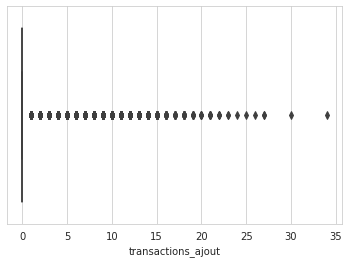

In [27]:
sns.boxplot(activite['transactions_ajout'])

/home/gillesa/anaconda3/envs/vcub_keeper/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.



<AxesSubplot:xlabel='transactions_ajout'>

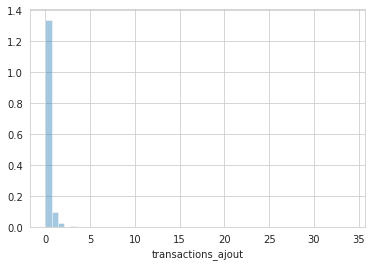

In [28]:
sns.distplot(activite['transactions_ajout'])

### Analyse des dépot suivant les stations

In [29]:
ajout_by_station = \
    activite.groupby('station_id',
                     as_index=False)['transactions_ajout'].agg({'max': 'max',
                                                              'mean': 'mean',
                                                              'median': 'median',
                                                              'min': 'min',
                                                              'std': 'std',
                                                              'var': 'var',
                                                              'skew': 'skew',
                                                              '25%': lambda x: x.quantile(0.25),
                                                              '75%': lambda x: x.quantile(0.75),
                                                              '95%':  lambda x: x.quantile(0.95)
                                                             })

ajout_by_station.sort_values('mean', ascending=0, inplace=True)

In [30]:
ajout_by_station

station_id   max      mean  median  min       std       var        skew  \
105         106  21.0  0.565402     0.0  0.0  1.436742  2.064227    4.793953   
4             5  34.0  0.447965     0.0  0.0  1.123620  1.262522    6.358837   
21           22  20.0  0.433349     0.0  0.0  0.967461  0.935980    3.590204   
122         123  22.0  0.417160     0.0  0.0  1.265391  1.601213    6.217226   
38           39  25.0  0.416512     0.0  0.0  1.089252  1.186470    5.404568   
..          ...   ...       ...     ...  ...       ...       ...         ...   
159         160   3.0  0.001156     0.0  0.0  0.041354  0.001710   43.742844   
75           76   1.0  0.000046     0.0  0.0  0.006801  0.000046  147.037410   
92           93   0.0  0.000000     0.0  0.0  0.000000  0.000000    0.000000   
136         137   0.0  0.000000     0.0  0.0  0.000000  0.000000    0.000000   
34           35   0.0  0.000000     0.0  0.0  0.000000  0.000000    0.000000   

     25%  75%  95%  
105  0.0  1.0  3.0  
4    0.0  0.0  2.0  
21   0.0  0.0  2.0  
122  0.0  0.0  2.0  
38   0.0  0.0  2.0  
..   ...  ...  ...  
159  0.0  0.0  0.0  
75   0.0  0.0  0.0  
92   0.0  0.0  0.0  
136  0.0  0.0  0.0  
34   0.0  0.0  0.0  

[174 rows x 11 columns]

In [32]:
# Station les plus active sur les dépôt de vélo
plot_station_activity(activite, station_ids=[106, 5], feature_to_plot='transactions_ajout')

In [34]:
# Station les plus active sur les dépôt de vélo
plot_station_activity(activite, station_ids=[160, 76], feature_to_plot='transactions_ajout')

In [35]:
activite.head()

gid  station_id type       name state  available_stand  available_bike  \
0   83           1  VLS  Meriadeck     1               18               2   
1   83           1  VLS  Meriadeck     1               18               2   
2   83           1  VLS  Meriadeck     1               18               2   
3   83           1  VLS  Meriadeck     1               18               2   
4   83           1  VLS  Meriadeck     1               18               2   

                 date  transactions_ajout  
0 2017-07-09 00:03:04                 0.0  
1 2017-07-09 00:04:04                 0.0  
2 2017-07-09 00:09:04                 0.0  
3 2017-07-09 00:14:03                 0.0  
4 2017-07-09 00:19:04                 0.0

In [37]:
plot_station_activity(activite, station_ids=[5], feature_to_plot='available_bike',
                      start_date='2017-08-22', end_date='2017-08-30')